In [1]:
from utility_bferror import *
import datetime

tb = BFSolver_Toolbox()
er = BFSovler3D_Error()

# 1. Try One Case

array([0.04032981, 0.08084825, 0.09570109])

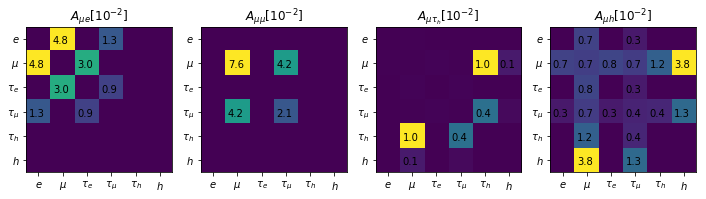

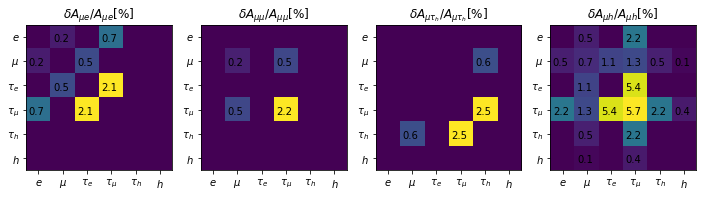

In [2]:
i,trigger = 0,"mu"

ndata,ndataVar = er.ndata[i],er.ndataVar[i]
nmcbg,nmcbgVar = er.nmcbg[i],er.nmcbgVar[i]
nfake,nfakeVar = er.nfake[i],er.nfakeVar[i]
a,aVar = er.a[i],er.aVar[i]
aVar[a<0.001]=np.zeros_like(a)[a<0.001]Marco Rovere

tb.imshow4Matrix(a,trigger)
tb.imshow4Matrix(aVar**0.5/(a+1e-12),trigger,showError=True)

slv = BFSolver3D(a)
slv.solveQuadEqn(slv.setMeasuredX(nData=ndata, nMcbg=nmcbg+nfake))

# 2. Calculate Statistical Error

In [6]:
statistcal = [ er.errStat(source) for source in ["data","mcbg","fake","mcsg"] ]
sysCrossSection = [ er.errSystem_crossSection(source) for source in ["mcbg","fake","mcsg"] ]
sysObjectEff = [ er.errSystem_objectEff(source) for source in ["e","mu","tau"] ]
sysEnergyScale = [ er.errSystem_energyScale(source) for source in ["e","mu","tau"] ]
errSystem_ttTheory = [ er.errSystem_upDownVariation(source) for source in [ "ISR","FSR","UE","MEPS"] ]
sysJet = [ er.errSystem_upDownVariation(source) for source in ["JES","JER","BTag","Mistag"] ]
sysLHE = [ er.errSystem_upDownVariation(source) for source in ["Renorm","Factor","PDF"] ]

FileNotFoundError: [Errno 2] No such file or directory: '/Users/zihengchen/Documents/Analysis/workplace/data/count/count_ePtDown.pkl'

In [3]:
err = np.array(statistcal 
#                 + sysCrossSection
#                 + sysObjectEff
#                 + sysTTTheory
#                 + sysEnergyScale
#                 + sysJet
#                 + sysLHE
              )
err = err.transpose(1,0,2)
er.io_printErrorForExcelFormat(err)

0.257,0.227,0.543, 0.447,0.392,0.866, 0.324,0.262,0.689, 0.563,0.452,1.120


In [24]:
today = datetime.date.today()
np.save(common.dataDirectory() + "error/{}-{}-{}".format(today.year,today.month,today.day),err)